<a href="https://colab.research.google.com/github/SaketKaswa20/Nifty50_Stock_Price_Prediction/blob/main/Nifty50StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('BAJAJFINSV.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [ ]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3196,2021-04-26,BAJAJFINSV,EQ,9916.65,9992.0,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
3197,2021-04-27,BAJAJFINSV,EQ,10001.75,10000.0,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
3198,2021-04-28,BAJAJFINSV,EQ,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
3199,2021-04-29,BAJAJFINSV,EQ,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151
3200,2021-04-30,BAJAJFINSV,EQ,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556


In [ ]:
df=df.drop(['Date','Symbol','Series','Prev Close','Turnover','Trades','Deliverable Volume','%Deliverble','Last'],axis=1)
df.head()

,Open,High,Low,Close,VWAP,Volume
0,600.00,619.00,501.0,509.10,548.85,3145446
1,505.00,610.95,491.1,554.65,572.15,4349144
2,564.00,665.60,564.0,640.95,618.37,4588759
3,656.65,703.00,608.0,632.40,659.60,4522302
4,642.40,668.00,588.3,644.00,636.41,3057669


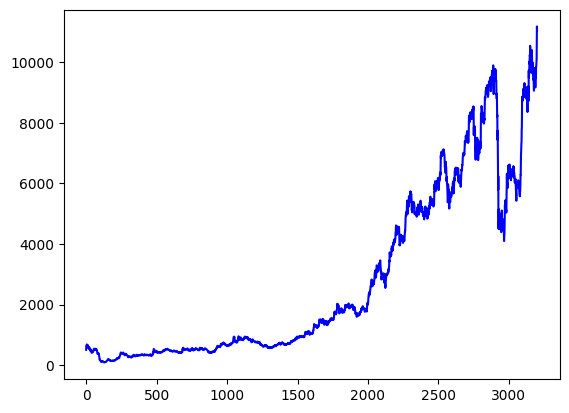

In [ ]:
plt.plot(df.Close, 'b')

In [ ]:
moveavg100=df.Close.rolling(100).mean() #Moving Average 100
moveavg100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3196    9430.5110
3197    9443.3575
3198    9460.6625
3199    9484.9625
3200    9507.3570
Name: Close, Length: 3201, dtype: float64

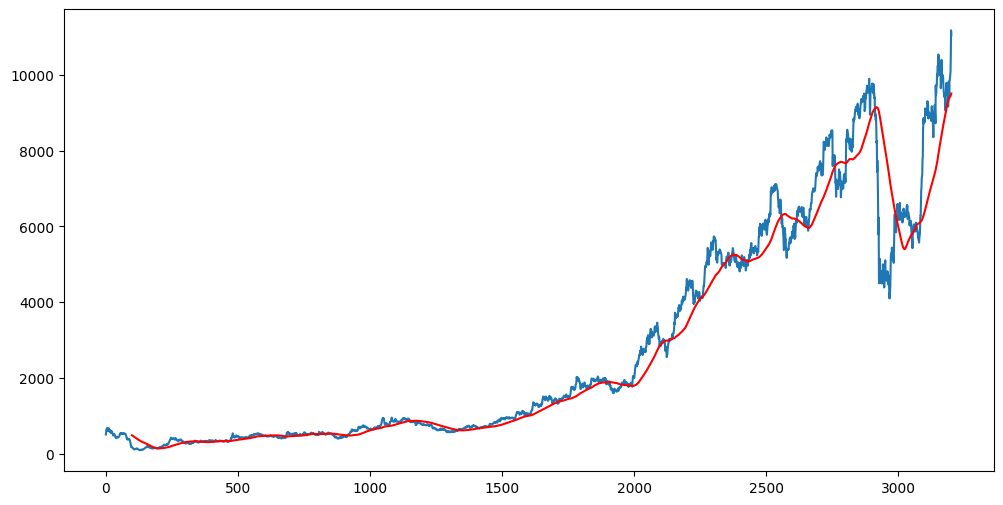

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moveavg100, 'r') #That r specifies red colour

In [ ]:
moveavg200=df.Close.rolling(200).mean() #Moving Average 200
moveavg100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3196    9430.5110
3197    9443.3575
3198    9460.6625
3199    9484.9625
3200    9507.3570
Name: Close, Length: 3201, dtype: float64

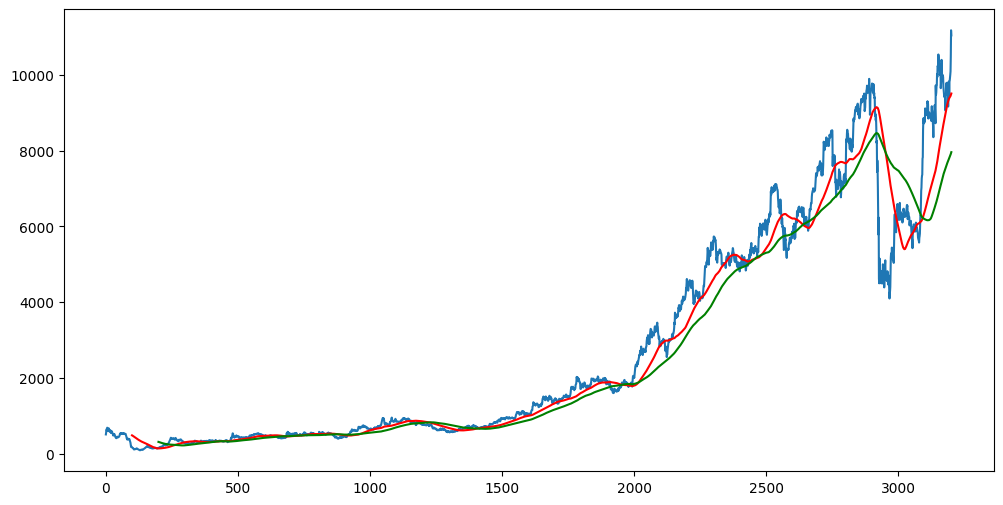

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moveavg100, 'r') #That r specifies red colour
plt.plot(moveavg200, 'g') #That g specifies green colour

In [ ]:
df.shape

(3201, 6)

In [ ]:
#Splitting Data into Training and Testing

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) #Keeping 70% Data for training that's why 0.7
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2240, 1)
(961, 1)


In [ ]:
data_testing.head()

,Close
2240,4176.85
2241,4128.40
2242,4098.40
2243,4199.70
2244,4242.45


In [ ]:
from sklearn.preprocessing import MinMaxScaler #To Scale data between 0 and 1
scaler= MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.09253177],
       [0.10260664],
       [0.1216947 ],
       ...,
       [0.92658947],
       [0.91822877],
       [0.89842186]])

In [ ]:
data_training_array.shape

(2240, 1)

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i:0])

x_train, y_train= np.array(x_train), np.array(y_train)


In [ ]:
x_train.shape

(2140, 100, 1)

## ML MODEL

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #Only 1 unit because we are prediciting only closing price

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
67/67 [==============================] - 25s 288ms/step - loss: nan
Epoch 2/50
67/67 [==============================] - 20s 304ms/step - loss: nan
Epoch 3/50
67/67 [==============================] - 19s 288ms/step - loss: nan
Epoch 4/50
67/67 [==============================] - 20s 303ms/step - loss: nan
Epoch 5/50
67/67 [==============================] - 20s 304ms/step - loss: nan
Epoch 6/50
67/67 [==============================] - 20s 304ms/step - loss: nan
Epoch 7/50
67/67 [==============================] - 19s 284ms/step - loss: nan
Epoch 8/50
67/67 [==============================] - 20s 304ms/step - loss: nan
Epoch 9/50
67/67 [==============================] - 19s 284ms/step - loss: nan
Epoch 10/50
67/67 [==============================] - 20s 305ms/step - loss: nan
Epoch 11/50
67/67 [==============================] - 19s 283ms/step - loss: nan
Epoch 12/50
67/67 [==============================] - 20s 304ms/step - loss: nan
Epoch 13/50
67/67 [==============================

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df= past_100_days.append(data_testing, ignore_index=True)

<ipython-input-24-cdf4f417b3b1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= past_100_days.append(data_testing, ignore_index=True)


In [ ]:
input_data=scaler.fit_transform(final_df)

In [ ]:
input_data.shape

(1061, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(961, 100, 1)
(961,)


## Making Predictions

In [ ]:
y_predicted= model.predict(x_test)

31/31 [==============================] - 4s 110ms/step


In [ ]:
y_predicted

array([[0.00039143],
       [0.00039138],
       [0.00039147],
       [0.0003915 ],
       [0.00039138],
       [0.00039118],
       [0.000391  ],
       [0.00039098],
       [0.00039117],
       [0.00039143],
       [0.00039149],
       [0.00039121],
       [0.00039053],
       [0.00038948],
       [0.00038814],
       [0.0003866 ],
       [0.00038496],
       [0.00038333],
       [0.00038174],
       [0.00038023],
       [0.00037878],
       [0.00037751],
       [0.00037664],
       [0.0003765 ],
       [0.00037727],
       [0.00037878],
       [0.00038132],
       [0.00038513],
       [0.00039053],
       [0.00039781],
       [0.00040717],
       [0.00041891],
       [0.00043271],
       [0.0004481 ],
       [0.00046463],
       [0.0004819 ],
       [0.00049952],
       [0.0005172 ],
       [0.00053485],
       [0.00055257],
       [0.00057043],
       [0.00058824],
       [0.00060558],
       [0.0006219 ],
       [0.00063696],
       [0.00065093],
       [0.0006638 ],
       [0.000

In [ ]:
scaler= scaler.scale_
scaler

array([0.00012249])

In [ ]:
scale_factor=1/0.00012249
y_predicted= y_predicted * scale_factor
y_test= y_test * scale_factor

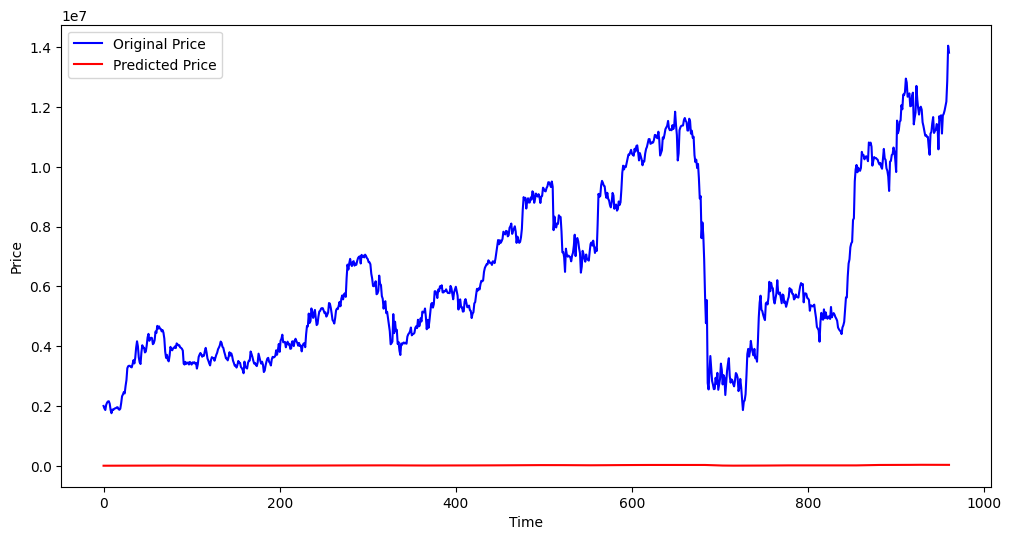

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()